In [36]:
import torch
from torch.utils.data import Dataset, random_split, DataLoader
import torchvision
from torchvision import transforms




transform = transforms.Compose([
    transforms.ToTensor(),
])


data = torchvision.datasets.FashionMNIST('path', download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(data, batch_size=16, shuffle=True)

Podział na zbiór treningowy i tesowy


In [37]:
import numpy as np
from torch.utils.data import random_split, DataLoader


total_size = len(data)
train_size = int(0.8 * total_size)  
unused_size = int(0 * total_size)  
test_size = total_size - train_size - unused_size  

train_dataset, test_dataset, _ = random_split(data, [train_size, test_size, unused_size])




train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(unused_size, train_size, test_size)

0 48000 12000


Definicja modelu

In [38]:
from torch import nn


class FashionMNISTModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(FashionMNISTModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size1, output_size)

    def forward(self, x):
        x = x.flatten(start_dim=1)  # Spłaszcz tensor wejściowy
        x = self.fc1(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x
   

Trening

Epoch [1/5], Step [100/3750], Loss: 0.4536
Epoch [1/5], Step [200/3750], Loss: 1.1571
Epoch [1/5], Step [300/3750], Loss: 0.5324
Epoch [1/5], Step [400/3750], Loss: 0.2255
Epoch [1/5], Step [500/3750], Loss: 0.3840
Epoch [1/5], Step [600/3750], Loss: 0.2874
Epoch [1/5], Step [700/3750], Loss: 0.8997
Epoch [1/5], Step [800/3750], Loss: 0.5333
Epoch [1/5], Step [900/3750], Loss: 0.3373
Epoch [1/5], Step [1000/3750], Loss: 0.0465
Epoch [1/5], Step [1100/3750], Loss: 0.6006
Epoch [1/5], Step [1200/3750], Loss: 0.4817
Epoch [1/5], Step [1300/3750], Loss: 0.8152
Epoch [1/5], Step [1400/3750], Loss: 0.4192
Epoch [1/5], Step [1500/3750], Loss: 0.4727
Epoch [1/5], Step [1600/3750], Loss: 0.3554
Epoch [1/5], Step [1700/3750], Loss: 0.7902
Epoch [1/5], Step [1800/3750], Loss: 0.4066
Epoch [1/5], Step [1900/3750], Loss: 0.5682
Epoch [1/5], Step [2000/3750], Loss: 0.7884
Epoch [1/5], Step [2100/3750], Loss: 0.3829
Epoch [1/5], Step [2200/3750], Loss: 0.2331
Epoch [1/5], Step [2300/3750], Loss: 0.25

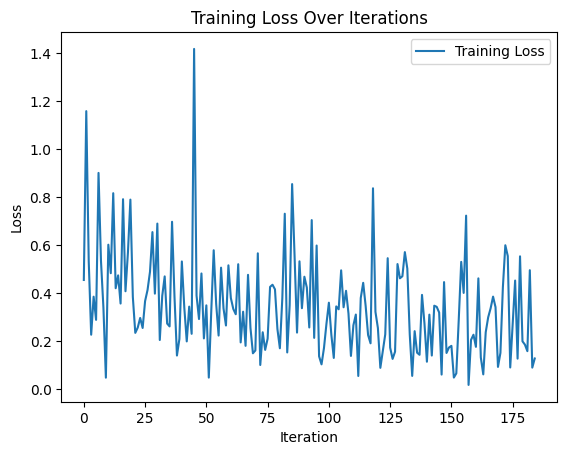

Trening zakończony pomyślnie!


In [39]:
from torch import optim

input_size = 28 * 28  
hidden_size1 = 1000
hidden_size2 = 0
output_size = 10  
model = FashionMNISTModel(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(data_loader):

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

       
        if (i + 1) % 100 == 0:
            losses.append(loss.item())
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(data_loader)}], Loss: {loss.item():.4f}')


# plot loss
import matplotlib.pyplot as plt
plt.plot(losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.legend()
plt.show()

print("Trening zakończony pomyślnie!")

Test modelu na zbiorze testowym

In [40]:
model.eval()  # Ustaw model w tryb ewaluacji (wyłącza dropout i batch normalization)

correct = 0
total = 0

with torch.no_grad():   
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Dokładność modelu na zbiorze testowym: {accuracy * 100:.2f}%')


Dokładność modelu na zbiorze testowym: 90.61%
